<a href="https://colab.research.google.com/github/Bestakdv/vhs-intro-ai/blob/main/mnist_digit_recognition_cnn_Yefimenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Flatten

#Loads the data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

#Plots the data
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i in range(10):
    axes[i].imshow(X_train[y_train == i][0])
    #Gets rid of the axis
    axes[i].axis('off')
    axes[i].set_title(f"Class {i}")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

#Dividing by 255 to make it between [0,1] for white and black pixels
X_train = X_train / 255.0
X_test = X_test / 255.0

#Reshaping
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.8607 - loss: 0.4441 - val_accuracy: 0.9823 - val_loss: 0.0595
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 29ms/step - accuracy: 0.9730 - loss: 0.0879 - val_accuracy: 0.9874 - val_loss: 0.0380
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9811 - loss: 0.0631 - val_accuracy: 0.9875 - val_loss: 0.0372
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9827 - loss: 0.0550 - val_accuracy: 0.9905 - val_loss: 0.0286
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 33ms/step - accuracy: 0.9847 - loss: 0.0488 - val_accuracy: 0.9903 - val_loss: 0.0279
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 30ms/step - accuracy: 0.9859 - loss: 0.0440 - val_accuracy: 0.9903 - val_loss: 0.0287
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9872 - loss: 0.0395 - val_accuracy: 0.9918 - val_loss: 0.0245
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9881 -

<Axes: title={'center': 'Accuracy'}>

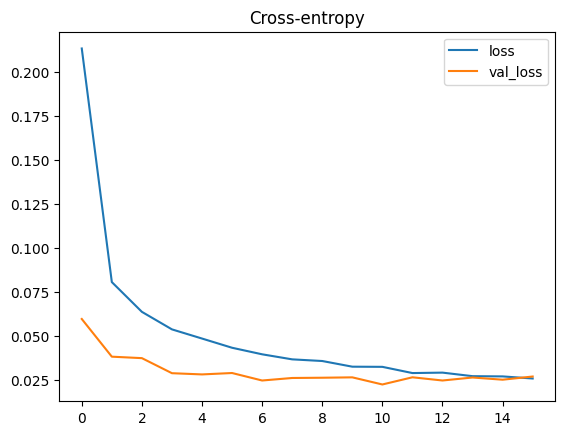

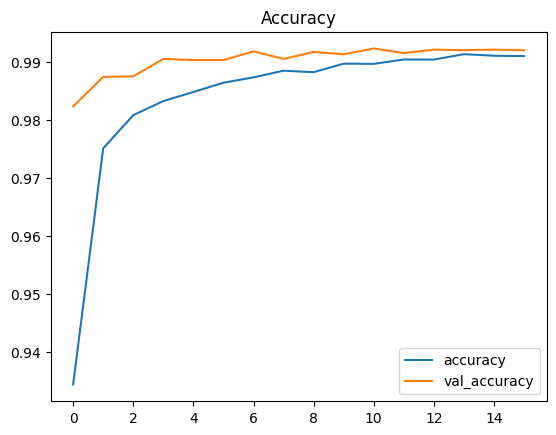

In [3]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

#One hot encode to get categorical_crossentropy to work
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_val_one_hot = to_categorical(y_test, num_classes=10)

#Best model(results are at the very bottom of every trial)
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

#Cnn model
mnist_cnn = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax"),
])

#Defining optimizer
optimizer = Adam(learning_rate=0.001)

# Compile the model with the Adam optimizer
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

mnist_cnn.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

# Best based on results
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train the model
history = mnist_cnn.fit(
    X_train, y_train_one_hot,
    validation_data=(X_test, y_val_one_hot),
    batch_size=32,
    epochs=30,
    callbacks=[early_stopping],
)

mnist_cnn.save_weights('mnist_nn.weights.h5', overwrite=True)

# Plot the results
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 312,416 (1.19 MB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

None


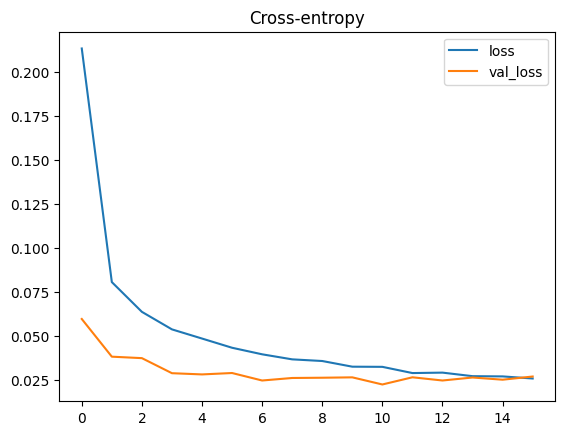

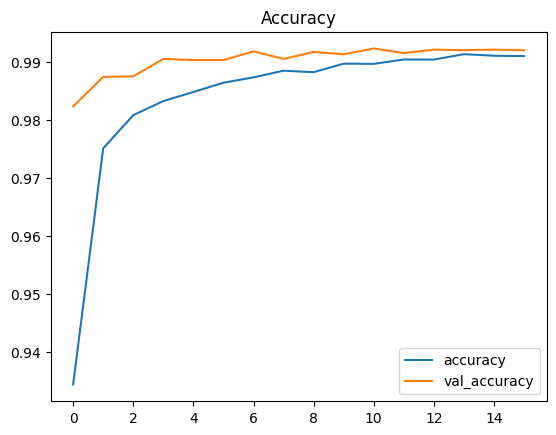

In [8]:
mnist_cnn.save_weights('mnist_nn.weights.h5', overwrite=True)
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")
mnist_cnn.summary()
print(model.summary())

1. Data Handling:
In the first model each pixel of the 28x28 image is treated like a seperate input while in the CNN model it takes the images as they are and it uses layers that can look at it in small parts at a time.

2. Parameter Sharing:
In the first model each connection has its own weight and the number of weights can get high while in CNN the model shares weights and can use same weights for similar features in the image so it will reduce the total number of parameters.

3. Training time:
The first model is simplier and has fewer layers making it train faster in simple models but not in complex models while the CNN model takes longer to train as it has more layers and is more complex.

4. Total number of params is: 104,480 for CNN and 312,416 for other model as in CNN the model can share weights and use same weights for similar features

**How can different epochs have very different val_loss but very similar val_accuracy**

Loss is the proability so if model is less confident but is still correct the loss while increase whil the accuracy stays the same. This causes ths val_loss to spike while accuracy remains sames/increases.

**What is cross-entropy(explain math):**
Cross entropy is a way to measure how good a model's prediction matches the actual data and it uses the formula:
$ -\sum_{i=1}^{C}p(i)log(q(i))$